### Part1

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
TESS = "/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/TESS/TESS Toronto emotional speech set data/"
RAV = "/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/RAVDESS/"
SAVEE = "/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/SAVEE/ALL/"
CREMA = "/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/CREMA/AudioWAV/"

In [ ]:
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error')
    path.append(SAVEE + i)

# Now check out the label count distribution
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_sad          60
male_fear         60
male_disgust      60
male_surprise     60
male_angry        60
male_happy        60
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)


RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
female_angry        96
female_surprise     96
male_fear           96
female_fear         96
female_happy        96
male_angry          96
male_happy          96
male_sad            96
female_sad          96
male_disgust        96
male_surprise       96
female_disgust      96
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(TESS)
dir_list.sort()
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_angry       400
female_surprise    400
female_happy       400
female_disgust     400
female_fear        400
female_neutral     400
female_sad         400
Unknown             14
Name: labels, dtype: int64

In [ ]:
TESS_df = TESS_df[TESS_df.labels != 'Unknown']

In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)

CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_sad          671
male_angry        671
male_happy        671
male_disgust      671
male_fear         671
female_happy      600
female_disgust    600
female_fear       600
female_sad        600
female_angry      600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [ ]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_path.csv",index=False)

female_happy       1096
female_disgust     1096
female_fear        1096
female_angry       1096
female_sad         1096
female_neutral     1056
male_neutral        839
male_disgust        827
male_sad            827
male_angry          827
male_happy          827
male_fear           827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


### Part2

In [ ]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation?
        if aug == 1:
            data = speedNpitch(data)

        # which feature?
        if mfcc == 1:
            # MFCC extraction
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC

        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec

        cnt += 1

    return X


'''
3. Confusion matrix plot
'''
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

'''
# 5. Other functions
'''
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches.
    So instead of repeating the functions each time, we assign the results into on object with its associated variables
    depending on each combination:
        1) MFCC with no augmentation
        2) MFCC with augmentation
        3) Logmelspec with no augmentation
        4) Logmelspec with augmentation
    '''

    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test,
                                 batch_size=16,
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)

    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''

        preds = model.predict(X_test,
                         batch_size=16,
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        # print(accuracy_score(actual, preds))

        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique()
        classes.sort()

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

In [ ]:
ref=pd.read_csv("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_path.csv")

In [ ]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc = prepare_data(ref, n = n_mfcc, aug = 0, mfcc = 1)

 14%|█▍        | 1705/12162 [15:28<1:41:10,  1.72it/s]

KeyboardInterrupt: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=16, verbose = 2, epochs=20)

Epoch 1/20
68/68 - 32s - loss: 2.6428 - acc: 0.1500 - val_loss: 2.3413 - val_acc: 0.2111
Epoch 2/20
68/68 - 1s - loss: 2.2333 - acc: 0.2509 - val_loss: 2.6287 - val_acc: 0.1083
Epoch 3/20
68/68 - 1s - loss: 2.0509 - acc: 0.3102 - val_loss: 2.5350 - val_acc: 0.1694
Epoch 4/20
68/68 - 1s - loss: 1.8595 - acc: 0.3667 - val_loss: 2.6374 - val_acc: 0.1556
Epoch 5/20
68/68 - 1s - loss: 1.7435 - acc: 0.3972 - val_loss: 2.1616 - val_acc: 0.2639
Epoch 6/20
68/68 - 1s - loss: 1.6030 - acc: 0.4333 - val_loss: 1.6179 - val_acc: 0.4278
Epoch 7/20
68/68 - 1s - loss: 1.5011 - acc: 0.4898 - val_loss: 1.5486 - val_acc: 0.4750
Epoch 8/20
68/68 - 1s - loss: 1.4028 - acc: 0.5176 - val_loss: 1.3737 - val_acc: 0.5028
Epoch 9/20
68/68 - 1s - loss: 1.3266 - acc: 0.5296 - val_loss: 1.5761 - val_acc: 0.4222
Epoch 10/20
68/68 - 1s - loss: 1.2233 - acc: 0.5898 - val_loss: 1.3713 - val_acc: 0.5361
Epoch 11/20
68/68 - 1s - loss: 1.1715 - acc: 0.5981 - val_loss: 1.2971 - val_acc: 0.5722
Epoch 12/20
68/68 - 1s - loss

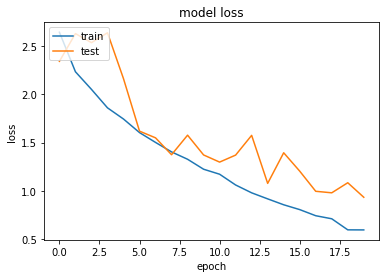

accuracy: 69.44%
23/23 - 0s


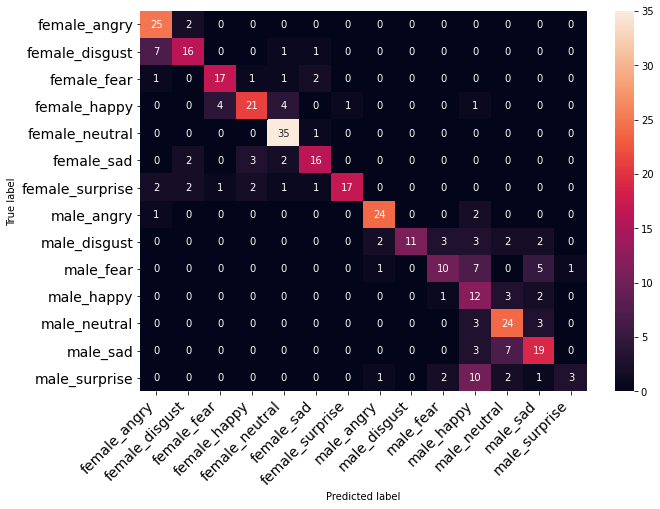

In [ ]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

### Part3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !zip -r "/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg_Attention.zip" "/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg_Attention"

In [ ]:
import keras
import tensorflow
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D,GlobalAveragePooling2D,GlobalAveragePooling1D,GlobalAveragePooling3D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.callbacks import Callback
from keras import applications
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_path_shuffled.csv")

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 2.1MB 5.8MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 
     |████████████████████████████████| 901kB 38.9MB/s 


In [ ]:
from transformers import Wav2Vec2FeatureExtractor,Wav2Vec2Processor,Wav2Vec2Model
import torch
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# def audio_feature_extractor(fname):
#   file_path = fname
#   input_length=16000*2.5
#   data, _ = librosa.load(file_path, sr=16000,duration=2.5)

#   # Random offset / Padding
#   if len(data) > input_length:
#       max_offset = len(data) - input_length
#       offset = np.random.randint(max_offset)
#       data = data[offset:(input_length+offset)]
#   else:
#       if input_length > len(data):
#           max_offset = input_length - len(data)
#           offset = np.random.randint(max_offset)
#       else:
#           offset = 0
#       data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")
#   return feature_extractor(data,sampling_rate=16000,return_tensors="pt").input_values

In [ ]:
sum(np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_Attention/Training/0_a.npy")[1])

37371.0

In [ ]:
# for i in range(0,91):
#   data=np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_Attention/Training/{}.npy".format(i))
#   attention=np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_Attention/Training/{}_a.npy".format(i))
#   x=np.ones((50,124,768))
#   for j in range(50):
#     input_values = processor(data[j], return_tensors="pt",sampling_rate=16000).input_values  # Batch size 1
#     hidden_states = model(input_values,output_hidden_states=True,attention_mask=torch.LongTensor(attention[j])).hidden_states
#     hidden_states = np.array([state.detach().numpy().reshape((124,768)) for state in hidden_states])
#     x[j]=np.average(hidden_states,axis=0,weights=[0.06,0.06,0.06,0.075,0.095,0.095,0.095,0.09,0.09,0.08,0.07,0.06,0.07])
#   np.save("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg_Attention/Training/{}.npy".format(i),x)
# for i in range(35,test_ids-1):
#   data=np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_Attention/Testing/{}.npy".format(i))
#   attention=np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data_Attention/Testing/{}_a.npy".format(i))
#   x=np.ones((50,124,768))
#   for j in range(50):
#     input_values = processor(data[j], return_tensors="pt",sampling_rate=16000).input_values  # Batch size 1
#     hidden_states = model(input_values,output_hidden_states=True,attention_mask=torch.LongTensor(attention[j])).hidden_states
#     hidden_states = np.array([state.detach().numpy().reshape((124,768)) for state in hidden_states])
#     x[j]=np.average(hidden_states,axis=0,weights=[0.06,0.06,0.06,0.075,0.095,0.095,0.095,0.09,0.09,0.08,0.07,0.06,0.07])
#   np.save("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg_Attention/Testing/{}.npy".format(i),x)

In [ ]:
label=list(df.labels)

In [ ]:
label

['female_angry',
 'male_neutral',
 'female_fear',
 'female_happy',
 'male_sad',
 'male_happy',
 'male_angry',
 'male_disgust',
 'female_sad',
 'female_neutral',
 'male_disgust',
 'male_surprise',
 'male_happy',
 'male_angry',
 'male_happy',
 'female_happy',
 'female_happy',
 'female_surprise',
 'female_disgust',
 'female_neutral',
 'female_sad',
 'female_disgust',
 'female_happy',
 'female_disgust',
 'female_fear',
 'male_disgust',
 'female_surprise',
 'female_angry',
 'female_fear',
 'male_happy',
 'female_angry',
 'female_sad',
 'male_disgust',
 'female_neutral',
 'male_angry',
 'male_sad',
 'female_disgust',
 'female_sad',
 'male_sad',
 'female_angry',
 'male_disgust',
 'female_sad',
 'female_neutral',
 'male_disgust',
 'female_neutral',
 'male_sad',
 'female_neutral',
 'female_happy',
 'female_disgust',
 'female_disgust',
 'male_happy',
 'male_sad',
 'female_happy',
 'male_neutral',
 'male_angry',
 'male_neutral',
 'male_happy',
 'male_fear',
 'male_happy',
 'female_sad',
 'male_ne

In [ ]:
import math
batch_size=50
label=list(df.labels)
le=LabelEncoder()
le.fit(label)
ids=math.ceil(df.shape[0]/batch_size)
train_ids=182
test_ids=ids-train_ids
print(ids,train_ids,test_ids)

244 182 62


In [ ]:
le.classes_

array(['female_angry', 'female_disgust', 'female_fear', 'female_happy',
       'female_neutral', 'female_sad', 'female_surprise', 'male_angry',
       'male_disgust', 'male_fear', 'male_happy', 'male_neutral',
       'male_sad', 'male_surprise'], dtype='<U15')

In [ ]:
# def audio_to_int(fname):
#     input_length=16000*2.5
#     file_path = fname
#     data, _ = librosa.load(file_path, sr=16000,duration=2.5)
#     if len(data) > input_length:
#         max_offset = len(data) - input_length
#         offset = np.random.randint(max_offset)
#         data = data[offset:(input_length+offset)]
#     else:
#         if input_length > len(data):
#             max_offset = input_length - len(data)
#             offset = np.random.randint(max_offset)
#         else:
#             offset = 0
#         data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")
#     return data

In [ ]:
# path=list(df.path)
# for i in range(train_ids):
#   x=np.zeros((50,40000))
#   for index,audio in enumerate(path[i*50:(i+1)*50]):
#     x[index]=audio_to_int(audio)
#   np.save("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data/Training/{}.npy".format(i),x)
# j=-1
# for i in range(train_ids,train_ids+test_ids-1):
#   x=np.zeros((50,40000))
#   for index,audio in enumerate(path[i*50:(i+1)*50]):
#     x[index]=audio_to_int(audio)
#   j=j+1
#   np.save("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data/Testing/{}.npy".format(j),x)
# x=np.zeros((12,40000))
# for index,audio in enumerate(path[(train_ids+test_ids-1)*50:]):
#   x[index]=audio_to_int(audio)
# j=j+1
# np.save("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Data/Testing/{}.npy".format(j),x)


In [ ]:
def training_generator(label,le):
  label=label[:9100]
  while 1:
    for i in range(train_ids):
      x=np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg_Attention/Training/{}.npy".format(i))
      #x=np.reshape(x,(x.shape[0],x.shape[1],1))
      mean = x.mean(axis=(1,2)).reshape((50,1,1))
      std = x.std(axis=(1,2)).reshape((50,1,1))
      x = (x - mean)/std
      y=label[i*50:(i+1)*50]
      y=np_utils.to_categorical(le.transform(y),num_classes=14)
      yield x,y
def testing_generator(label,le):
  label=label[9100:]
  while 1:
    for i in range(test_ids-1):
      x=np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg_Attention/Testing/{}.npy".format(i))
      #x=np.reshape(x,(x.shape[0],x.shape[1],1))
      mean = x.mean(axis=(1,2)).reshape((50,1,1))
      std = x.std(axis=(1,2)).reshape((50,1,1))
      x = (x - mean)/std
      y=label[i*50:(i+1)*50]
      y=np_utils.to_categorical(le.transform(y),num_classes=14)
      yield x,y

In [ ]:
x,y=next(training_generator(label,le))

NameError: ignored

In [ ]:
x.shape

(50, 124, 768)

In [ ]:
def get_tl_model():
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(124,768,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x=Convolution2D(3, (1,1), padding="same")(inp)
    m=tensorflow.keras.applications.(include_top=False,weights='imagenet',input_shape=(124,768,3))(x)
    #m.trainable=False
    # x = Convolution2D(32, (4,10), padding="same")(inp)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # x = MaxPool2D()(x)
    # x = Dropout(rate=0.2)(x)

    # x = Convolution2D(32, (4,10), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # x = MaxPool2D()(x)
    # x = Dropout(rate=0.2)(x)

    # x = Convolution2D(32, (4,10), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # x = MaxPool2D()(x)
    # x = Dropout(rate=0.2)(x)

    # x = Convolution2D(32, (4,10), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # x = MaxPool2D()(x)
    # x = Dropout(rate=0.2)(x)

    x = Flatten()(m)
    #x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)

    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    model.layers[0].trainable = False

    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
new_model=get_tl_model()
new_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 124, 768, 1)]     0         
_________________________________________________________________
conv2d_416 (Conv2D)          (None, 124, 768, 3)       6         
_________________________________________________________________
densenet121 (Functional)     (None, 3, 24, 1024)       7037504   
_________________________________________________________________
flatten_4 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 73728)             0         
_________________________________________________________________
batch_normalization_414 (Bat (None, 73728)             294912    
_________________________________________________________________
activation_410 (Activation)  (None, 73728)             0   

In [ ]:
#mc = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Model weights/weights{epoch:02d}.h5', save_weights_only=True, period=1)
hist=new_model.fit_generator(generator=training_generator(label,le),steps_per_epoch=182,epochs=10,validation_data=testing_generator(label,le),validation_steps=61)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
def get_2d_conv_model():
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(124,768,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)

    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)

    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)

    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
model = get_2d_conv_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 124, 768, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 768, 32)      1312      
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 768, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 124, 768, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 384, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 384, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 384, 32)       40992 

In [ ]:
mc = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Model weights/weights{epoch:02d}.h5', save_weights_only=True, period=1)
hist=model.fit_generator(generator=training_generator(label,le),steps_per_epoch=182,epochs=20,callbacks=[mc],validation_data=testing_generator(label,le),validation_steps=61)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
182/182 [==============================] - 559s 3s/step - loss: 2.6158 - acc: 0.1624 - val_loss: 3.9903 - val_acc: 0.1807
Epoch 2/20
182/182 [==============================] - 393s 2s/step - loss: 1.7395 - acc: 0.4064 - val_loss: 1.5858 - val_acc: 0.4843
Epoch 3/20
182/182 [==============================] - 377s 2s/step - loss: 1.3734 - acc: 0.5304 - val_loss: 1.4114 - val_acc: 0.5666
Epoch 4/20
182/182 [==============================] - 352s 2s/step - loss: 1.1998 - acc: 0.5926 - val_loss: 1.5324 - val_acc: 0.4557
Epoch 5/20
182/182 [==============================] - 346s 2s/step - loss: 1.0727 - acc: 0.6270 - val_loss: 1.9733 - val_acc: 0.3492
Epoch 6/20
182/182 [==============================] - 328s 2s/step - loss: 1.0171 - acc: 0.6438 - val_loss: 1.8911 - val_acc: 0.3770
Epoch 7/20
182/182 [==============================] - 312s 2s/step - loss: 0.9414 - acc: 0.6640 - val_loss: 2.9683 - val_acc: 0.2911
Epoch 8/20
182/182 [==============================] - 334s 2s/step - 

KeyboardInterrupt: ignored

In [ ]:
model.save("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2AvgAttention_GlobalAverage.h5")
# model_json = model.to_json()
# with open("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg_CNN.json", "w") as json_file:
#     json_file.write(model_json)

In [ ]:
pred=list()
for i in range(5):
  x=np.load("/content/drive/MyDrive/Speech Emotion Recognition/Kaggle SER/Wav2Vec2Avg/Testing/{}.npy".format(i))
  x=loaded_model.predict(x,batch_size=50,verbose=1)
  x=x.argmax(axis=1)
  pred.extend(x)

1/1 [==============================] - 3s 3s/step


In [ ]:
le.inverse_transform(pred)

array(['male_neutral', 'male_sad', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'female_fear', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'female_fear', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male_neutral', 'male_neutral', 'male_neutral', 'male_neutral',
       'male

In [ ]:
label[9100:9150]

['female_sad',
 'male_sad',
 'male_fear',
 'male_neutral',
 'female_neutral',
 'male_angry',
 'male_angry',
 'male_happy',
 'female_happy',
 'male_sad',
 'female_sad',
 'male_happy',
 'female_angry',
 'female_sad',
 'male_angry',
 'female_fear',
 'male_neutral',
 'male_fear',
 'female_fear',
 'male_disgust',
 'male_surprise',
 'female_fear',
 'male_fear',
 'male_fear',
 'male_neutral',
 'male_happy',
 'male_fear',
 'male_angry',
 'female_neutral',
 'male_neutral',
 'female_neutral',
 'female_neutral',
 'female_happy',
 'female_neutral',
 'female_neutral',
 'female_neutral',
 'female_sad',
 'female_surprise',
 'female_fear',
 'female_angry',
 'female_happy',
 'female_happy',
 'female_happy',
 'male_fear',
 'female_happy',
 'male_surprise',
 'male_happy',
 'female_fear',
 'female_disgust',
 'female_fear']

In [ ]:
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches.
    So instead of repeating the functions each time, we assign the results into on object with its associated variables
    depending on each combination:
        1) MFCC with no augmentation
        2) MFCC with augmentation
        3) Logmelspec with no augmentation
        4) Logmelspec with augmentation
    '''

    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt = optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test,
                                 batch_size=16,
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)

    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''

        preds = model.predict(X_test,
                         batch_size=16,
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        # print(accuracy_score(actual, preds))

        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique()
        classes.sort()

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

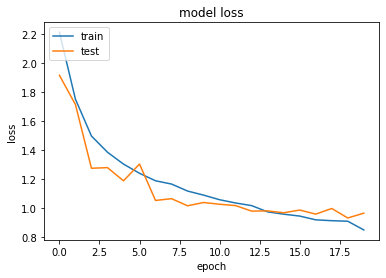

accuracy: 64.39%
191/191 - 1s


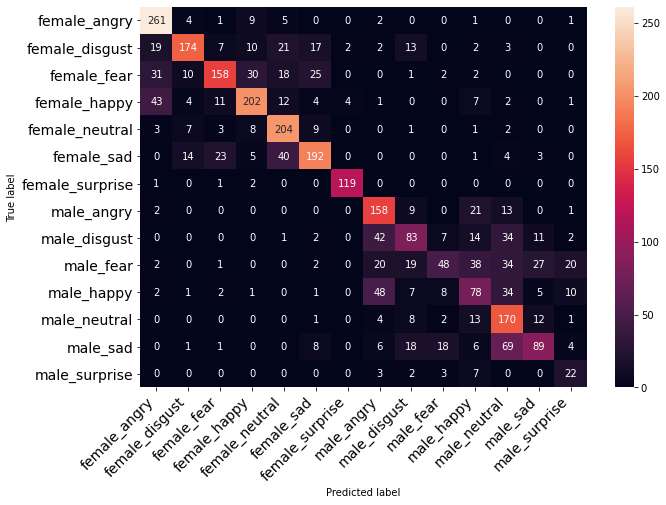

In [ ]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

In [ ]:
a=pd.Series([1,2,3,4])
a[0]=2
a

0    2
1    2
2    3
3    4
dtype: int64